Skylar Stolte
10/02/18
BME6938
Homework 1

Part A: Load the Dataset into a Notebook

In [40]:
#import libraries for use
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from urllib.request import urlopen
import pylab
import seaborn as sns

In [41]:
#import data from url
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/postoperative-patient-data/post-operative.data'
headers = ["L-CORE", "L-SURF", "L-02", "L-BP", "SURF-STBL", "CORE-STBL", "BP-STBL", "COMFORT", "decision ADM-DECS"] #proper headings
Post_OP_data = pd.read_csv(url,delimiter = ',', names = headers, skipinitialspace = True)

Part C: Perform any preprocessing steps and explain why any step was needed in a markdown cell below.

In [42]:
#Preprocessing: remove random spacing
for i in headers:
    Post_OP_data[i] = Post_OP_data[i].map(str.strip)

First preprocessing stage: this stage is necessary to remove random spacing that appears in strings, like that due to a typo when a resident is entering clinical data into the system. The "for" loop iterates through all headers so spacing is removed wherever it might appear and the data is alligned. An "A" was experimentally observed as "A " in row three originally.

In [43]:
#load text files that represent index and post-op names
INDEX_data = open('INDEX.txt', 'r').read()
Post_OP_name = open('post-operative_names.txt', 'r').read()

In [44]:
#test to see whether text loaded properly
print(INDEX_data)
print(Post_OP_data)
print(Post_OP_name)

Index of postoperative-patient-data

02 Dec 1996      147 Index
29 Jun 1993     2695 post-operative.names
28 Jun 1993     4379 post-operative.data

   L-CORE L-SURF       L-02  L-BP SURF-STBL CORE-STBL     BP-STBL COMFORT  \
0     mid    low  excellent   mid    stable    stable      stable      15   
1     mid   high  excellent  high    stable    stable      stable      10   
2    high    low  excellent  high    stable    stable  mod-stable      10   
3     mid    low       good  high    stable  unstable  mod-stable      15   
4     mid    mid  excellent  high    stable    stable      stable      10   
5    high    low       good   mid    stable    stable    unstable      15   
6     mid    low  excellent  high    stable    stable  mod-stable      05   
7    high    mid  excellent   mid  unstable  unstable      stable      10   
8     mid   high       good   mid    stable    stable      stable      10   
9     mid    low  excellent   mid  unstable    stable  mod-stable      10   
10   

In [45]:
#show data description
Post_OP_data.head()

,L-CORE,L-SURF,L-02,L-BP,SURF-STBL,CORE-STBL,BP-STBL,COMFORT,decision ADM-DECS
0,mid,low,excellent,mid,stable,stable,stable,15,A
1,mid,high,excellent,high,stable,stable,stable,10,S
2,high,low,excellent,high,stable,stable,mod-stable,10,A
3,mid,low,good,high,stable,unstable,mod-stable,15,A
4,mid,mid,excellent,high,stable,stable,stable,10,A


In [46]:
#Preprocessing: remove rows with missing values
Post_OP_data = Post_OP_data.replace(Post_OP_data == '?', np.nan).dropna()
#Post_OP_data[Post_OP_data == '?'] = np.nan
#Post_OP_data.dropna()
#print(Post_OP_data)

Second preprocessing stage: some values may (and were observed!) to be missing or left out (whether computer or human error). This stage replaces non-values, entered as "?", as "not-a-number" (NaN) and removes them. The entire row is removed in order to keep the data for each patient consistent.

In [47]:
#preprocessing: map comfort values to their float equivalents for plotting
COMFORT_map = {'00':float(0), '01':float(1), '02':float(2), '03':float(3), '04':float(4), '05':float(5), '06':float(6), '07':float(7), '08':float(8), '09':float(9), '10':float(10), '11':float(11), '12':float(12), '13':float(13), '14':float(14), '15':float(15), '16':float(16), '17':float(17), '18':float(18), '19':float(19), '20':float(20)}
Post_OP_data['COMFORT'] = Post_OP_data['COMFORT'].map(COMFORT_map)
#print(Post_OP_data)

Third preprocessing stage: the pd.read_csv command as listed processes values as string-type. Comfort values are represented as string values on the range of integers on [0,20], which are mapped to the corresponding float variables for plotting convenience.

Part B: Explore the dataset by using a plot to represent each of the relationships between the categorical features and "comfort". Interpret the results in a markdown cell.

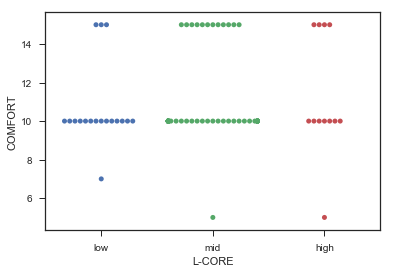

In [48]:
#plot COMFORT vs. L-CORE
sns.set(style="ticks", color_codes=True)
sns.swarmplot(x=Post_OP_data['L-CORE'], y=Post_OP_data['COMFORT'], order = ['low', 'mid', 'high']);

Standard internal body temperature, or L-CORE, is about 37 degrees Celsius. "mid" includes 36-37, "high" includes values greater than 37, and "low" includes values lower than 36. Therefore, it makes sense that greater comfort values are genearlly associated with mid-level internal temperatures. This is supported by a higher distribution of mid-level patients at higher comfort levels (specifically 15). As each category appears close to the "middle" comfort value of 10, it is likely that temperature is not as highly indicative of unhealth in comparison to other factors.

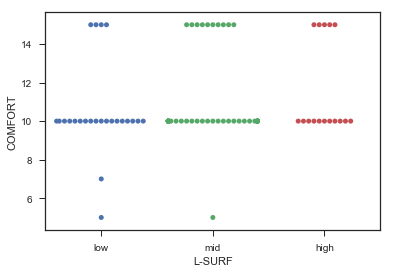

In [49]:
sns.set(style="ticks", color_codes=True)
sns.swarmplot(x=Post_OP_data['L-SURF'], y=Post_OP_data['COMFORT'], order = ['low', 'mid', 'high']);

Standard surface body temperature, or L-SURF, shows higher comfort values at middle values [35,36.5] degrees Celsius, as opposed to at high (above 36.6) or at low (below 35) levels. This indicates that normal temperature values could correlate with healthier conditions, but it is hard to differentiate low and mid cases based on these statistics. This makes sense since body surface temperature can vary depending on surrounding conditions. 

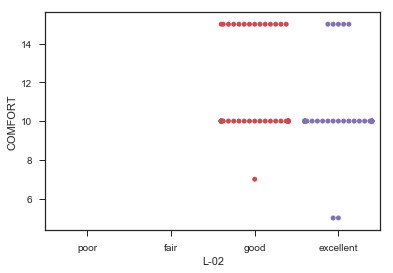

In [50]:
sns.set(style="ticks", color_codes=True)
sns.swarmplot(x=Post_OP_data['L-02'], y=Post_OP_data['COMFORT'], order = ['poor', 'fair', 'good', 'excellent']);

Standard Oxygen pressures should fall above 95 percent, with ranges of that include the following: poor (below 80%), fair (80-90%), good (90-98%), and excellent (98%). Good and excellent O2 values fall within acceptable ranges, so it makes sense that the comfort levels fall within the middle-to-high comfort ranges. NO patients fall within the poor-to-fair ranges; this indicates that low oxygen level was not a concern for the patients used in this dataset.

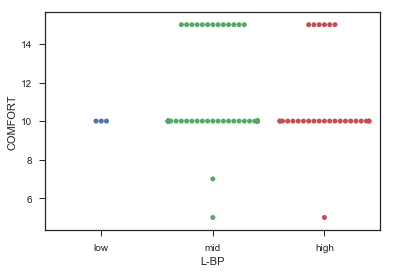

In [51]:
sns.set(style="ticks", color_codes=True)
sns.swarmplot(x=Post_OP_data['L-BP'], y=Post_OP_data['COMFORT'], order = ['low', 'mid', 'high']);

The middle-level blood pressure (BP) represents a healthy range for the general population of [90/70, 130/90], with high levels above this range and low levels below this range. More patients are found at higher comfort levels for this middle-BP range, which makes sense because healthy BP serves as a general representation of health (which insinuates higher comfort than otherwise). Lower BP values were rarely found; they were never found for patients with comfort values in the upper half of the range (above 10).

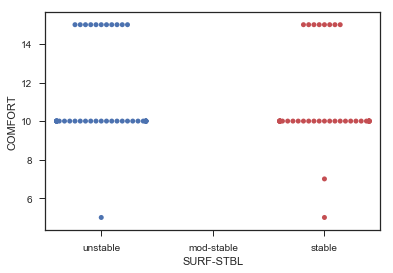

In [52]:
sns.set(style="ticks", color_codes=True)
sns.swarmplot(x=Post_OP_data['SURF-STBL'], y=Post_OP_data['COMFORT'], order = ['unstable', 'mod-stable', 'stable']);

The feature "SURF-STBL" indicates whether a person's body surface temperature was stable. It makes sense that many patients with surface temperatures that are not considered stable or moderately stable could still have average or mid-level comfort values, as body surface values are more subject to external variables or manipulators that features such as internal body temperature (which are more tightly regulated).

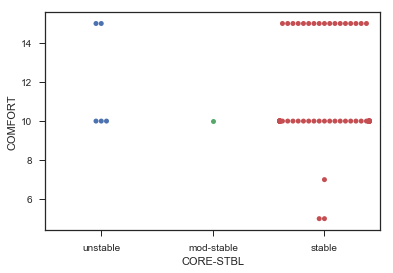

In [53]:
sns.set(style="ticks", color_codes=True)
sns.swarmplot(x=Post_OP_data['CORE-STBL'], y=Post_OP_data['COMFORT'], order = ['unstable', 'mod-stable', 'stable']);

The feature CORE-STBL represents the stability of the patients' internal body temperature. It makes sense that stable internal body temperature has greater correlation to higher comfort levels. Since the classification task focuses on hypothermia as a significant concern, it may also be possible that those with low comfort levels and unstable core temperatures may not be as likely to be sufficiently coherrent or able to answer the comfort, self-reported question (if a patient's condition renders him/her unresponsive).

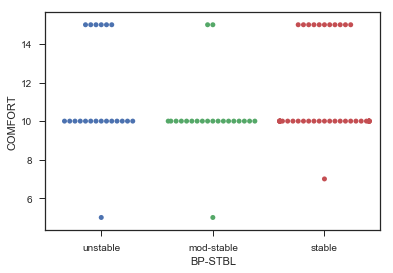

In [54]:
sns.set(style="ticks", color_codes=True)
sns.swarmplot(x=Post_OP_data['BP-STBL'], y=Post_OP_data['COMFORT'], order = ['unstable', 'mod-stable', 'stable']);

It is apparent and logical that stable blood pressures correlate to higher comfort levels. The distribution of comfort scores is shifted upwards for stable cases in comparison to the unstable and moderately stable cases. Blood pressure would more likely to be unstable in cases of hypothermia, in which it is more likely to be heightened in mild hypothermia and decreased in severe hypothermia.

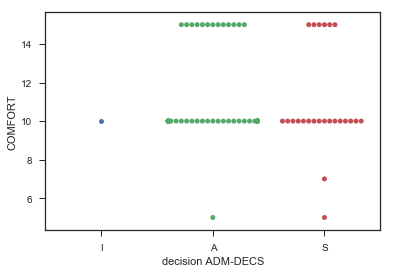

In [55]:
sns.set(style="ticks", color_codes=True)
sns.swarmplot(x=Post_OP_data['decision ADM-DECS'], y=Post_OP_data['COMFORT'], order = ['I', 'A', 'S']);

"Decision ADM-DECS" represents the final classification used to label patients based on the input features. The categories for labeling include the following: I = sent to the intensive care unit, A = sent to a general hospital floor, S = sent home. It makes sense that higher comfort levels would correlate to labels A or S. While more patients with higher comfort levels seem to fall under A rather than S, this could perhaps be influenced by the type of surgery that was performed and other additional attributes outside of those collected. It is also interesting that the overall accuracy of this approach was reported as 48%, which is fairly low. Further analysis would benefit from comparision of final label (attribute decision ADM-DECS) versus the true label (groundtruth). There were a fair number of patients who were reported as having unstable BP and internal and external temperatures versus the instances labeled as I. It is also possible that the hospital is more likely to send patients designated as mild to the general floor. Perhaps an attribute of hypothermia for 0-3 would benefit: 0 (negative), 1 (mild), 2 (moderate), 3 (severe).